## Neuronal Net Model

The following model predicts the bitcoin price change in weekly period using tweets for each day.
The variable target in True when the sentiment analysis equals the bitcoin positive increase.

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Import the data to process:

In [4]:
df = pd.read_csv('tweets_nlp_modelling_v3.csv')
print(df.shape)
df.head()

(20565, 8)


,date_clean,tweets,cleaned_tweets,crypto_sentiment,subjectivity,polarity,sentiment,target
0,2021-02-06,"""Will Institutional Investment Keep Pouring In...",Will Institutional Investment Keep Pouring Int...,positive,0.0,0.0,positive,True
1,2021-02-06,BTC Bitcoin You know where the WSB money is g...,BTC Bitcoin You know WSB money going WallStree...,positive,0.0,0.0,positive,True
2,2021-02-06,"🔼🔼 ₿1 = $38,868 (00:56 UTC)\n$BTC prices conti...",UTC BTC price continue rise Change since midni...,positive,0.0,0.0,positive,True
3,2021-02-06,BTC Bitcoin All the way up! 🚀 🚀 💵 💵 /xVyLbbWRiu,BTC Bitcoin All way xVyLbbWRiu,positive,0.0,0.0,positive,True
4,2021-02-06,Keep going BTC bitcoin,Keep going BTC bitcoin,positive,0.0,0.0,positive,True


In [6]:
max_words = 5000
max_len=50

def tokenize_pad_sequences(text):
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before Tokenization & Padding \n', df['cleaned_tweets'][0])
X, tokenizer = tokenize_pad_sequences(df['cleaned_tweets'])
print('------------------------------------------------------')
print('After Tokenization & Padding \n', X[0])

Before Tokenization & Padding 
 Will Institutional Investment Keep Pouring Into Bitcoin ehsnhs qEn btc bitcoin
After Tokenization & Padding 
 [ 300 1156  111  218 2915    1    2    1    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [7]:
y = pd.get_dummies(df['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)
print('Train Set: ', X_train.shape, y_train.shape)
print('Validation Set: ', X_val.shape, y_val.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (12339, 50) (12339, 3)
Validation Set:  (4113, 50) (4113, 3)
Test Set:  (4113, 50) (4113, 3)


In [8]:
def f1_score(precision, recall):
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

Variables:

In [16]:
vocab_size = 5000
embedding_size = 32
epochs = 50
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
batch_size = 128

In [11]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(3, activation='softmax'))

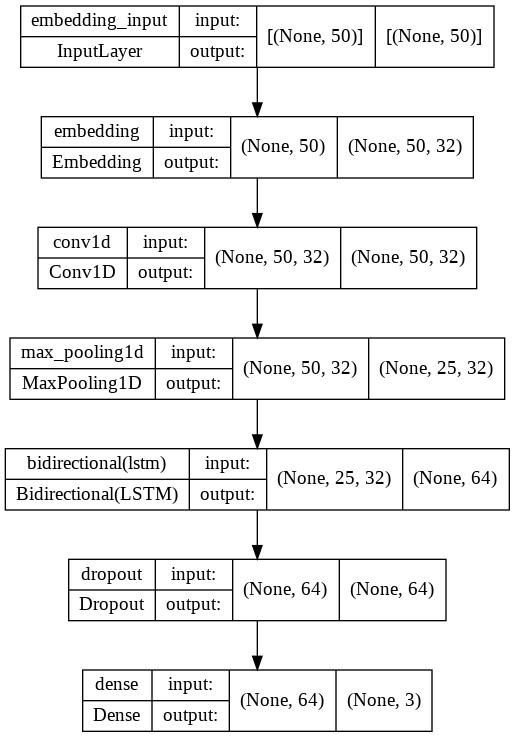

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.compile(loss='categorical_crossentropy', 
              optimizer=sgd, 
              metrics=['accuracy', 
                       Precision(), 
                       Recall()])

In [20]:
# Utilizar validation set para entrenar
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                          epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/50
97/97 - 5s - loss: 0.8832 - accuracy: 0.5927 - precision_2: 0.6332 - recall_2: 0.4863 - val_loss: 0.8887 - val_accuracy: 0.5901 - val_precision_2: 0.6245 - val_recall_2: 0.4950 - 5s/epoch - 48ms/step
Epoch 2/50
97/97 - 4s - loss: 0.8807 - accuracy: 0.5985 - precision_2: 0.6351 - recall_2: 0.4865 - val_loss: 0.8865 - val_accuracy: 0.5937 - val_precision_2: 0.6305 - val_recall_2: 0.4974 - 4s/epoch - 43ms/step
Epoch 3/50
97/97 - 4s - loss: 0.8784 - accuracy: 0.5991 - precision_2: 0.6365 - recall_2: 0.4908 - val_loss: 0.8843 - val_accuracy: 0.5952 - val_precision_2: 0.6323 - val_recall_2: 0.4991 - 4s/epoch - 41ms/step
Epoch 4/50
97/97 - 9s - loss: 0.8761 - accuracy: 0.6013 - precision_2: 0.6402 - recall_2: 0.4924 - val_loss: 0.8819 - val_accuracy: 0.5966 - val_precision_2: 0.6378 - val_recall_2: 0.4996 - 9s/epoch - 89ms/step
Epoch 5/50
97/97 - 7s - loss: 0.8725 - accuracy: 0.6055 - precision_2: 0.6457 - recall_2: 0.4988 - val_loss: 0.8792 - val_accuracy: 0.5991 - val_precision_2

In [22]:
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)

# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8140
Precision : 0.8417
Recall    : 0.7873
F1 Score  : 0.8136


In [25]:
def plot_confusion_matrix(model, X_test, y_test):
    
    sentiment_classes = ['Negative','Neutral', 'Positive']

    # use model to do the prediction
    y_pred = model.predict(X_test)

    # compute confusion matrix
    cm = confusion_matrix(np.argmax(y_pred, axis=1),np.argmax(np.array(y_test),axis=1))
    
    print(pd.Series(np.argmax(np.array(y_test),axis=1)).value_counts())
    print(pd.Series(np.argmax(y_pred, axis=1)).value_counts())
    
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

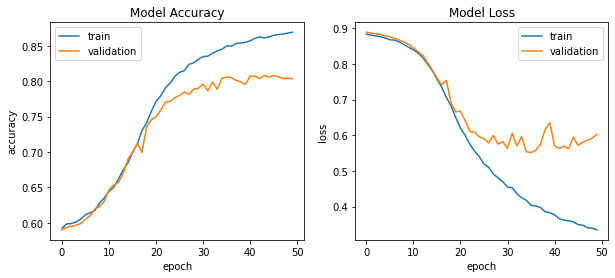

In [26]:
def plot_training_hist(history):

    fig, ax = plt.subplots(1,2, figsize=(10,4))

    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')

plot_training_hist(history)

2    2248
1    1417
0     448
dtype: int64
2    2506
1    1596
0      11
dtype: int64


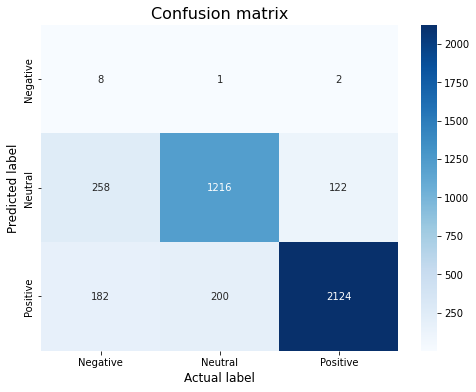

In [27]:
plot_confusion_matrix(model, X_test, y_test)